In [116]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN, SMOTETomek

In [118]:
data = pd.read_csv('test.csv', index_col=0)
data = data.dropna()
data

,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,...,Year,AllPrimaryCarePatientsAge0to17Per100,WellChildVisitsInPastYearAge0to17Per100,AsthmaDiagnosisAge0to17Per100,Unique0to17WithED_VisitPer100,NumberED_VisitsAge0to17Per100,NumberLowAcuityED_VisitsAge0to17Per100,NumberED_VisitsByChildrenUnder1YearOldPer100,NumberOfInjuryRelatedVisitsPer100,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17Per100
0,10300,2019.0,728.0,122.0,47.0,36.0,5.0,0.0,0.0,0.0,...,2019.0,38.524590,29.508197,4.098361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,20100,2019.0,5490.0,201.0,67.0,48.0,5.0,0.0,0.0,0.0,...,2019.0,33.333333,23.880597,2.487562,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,20300,2019.0,1212.0,41.0,38.0,39.0,2.0,0.0,0.0,0.0,...,2019.0,92.682927,95.121951,4.878049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,30500,2019.0,2109.0,381.0,280.0,219.0,49.0,0.0,0.0,0.0,...,2019.0,73.490814,57.480315,12.860892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,40200,2019.0,1576.0,100.0,68.0,50.0,17.0,0.0,0.0,0.0,...,2019.0,68.000000,50.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,564000,2016.0,6590.0,1597.0,511.0,428.0,54.0,90.6,155.0,196.0,...,2016.0,31.997495,26.800250,3.381340,9.705698,12.273012,3.569192,1.127113,0.125235,0.751409
1556,564100,2016.0,883.0,181.0,32.0,30.0,5.0,7.8,15.0,16.0,...,2016.0,17.679558,16.574586,2.762431,8.287293,8.839779,2.762431,0.552486,0.000000,0.552486
1557,564200,2016.0,2091.0,272.0,123.0,101.0,19.0,6.6,48.0,70.0,...,2016.0,45.220588,37.132353,6.985294,17.647059,25.735294,4.411765,1.838235,0.000000,3.308824
1558,564400,2016.0,5874.0,910.0,408.0,341.0,57.0,48.2,188.0,315.0,...,2016.0,44.835165,37.472527,6.263736,20.659341,34.615385,7.142857,5.274725,0.439560,4.175824


In [120]:
data['AsthmaDiagnosisAge0to17Per100'].describe()

count    1549.000000
mean        8.745462
std         6.375475
min         0.000000
25%         5.647059
50%         7.807808
75%        10.078387
max       105.555556
Name: AsthmaDiagnosisAge0to17Per100, dtype: float64

In [122]:
data['HighDiagnosisRate'] = (data['AsthmaDiagnosisAge0to17Per100']>=10).astype(int)
data[data['HighDiagnosisRate']==1]

,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,...,AllPrimaryCarePatientsAge0to17Per100,WellChildVisitsInPastYearAge0to17Per100,AsthmaDiagnosisAge0to17Per100,Unique0to17WithED_VisitPer100,NumberED_VisitsAge0to17Per100,NumberLowAcuityED_VisitsAge0to17Per100,NumberED_VisitsByChildrenUnder1YearOldPer100,NumberOfInjuryRelatedVisitsPer100,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17Per100,HighDiagnosisRate
3,30500,2019.0,2109.0,381.0,280.0,219.0,49.0,0.0,0.0,0.0,...,73.490814,57.480315,12.860892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,40200,2019.0,1576.0,100.0,68.0,50.0,17.0,0.0,0.0,0.0,...,68.000000,50.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
9,50100,2019.0,1745.0,336.0,364.0,264.0,47.0,0.0,0.0,0.0,...,108.333333,78.571429,13.988095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
10,50600,2019.0,2145.0,319.0,179.0,119.0,32.0,0.0,0.0,0.0,...,56.112853,37.304075,10.031348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
11,50900,2019.0,1348.0,339.0,256.0,200.0,50.0,0.0,0.0,0.0,...,75.516224,58.997050,14.749263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,552200,2016.0,870.0,136.0,108.0,86.0,17.0,12.4,87.0,158.0,...,79.411765,63.235294,12.500000,63.970588,116.176471,16.176471,11.029412,0.000000,21.323529,1
1542,552300,2016.0,1701.0,450.0,276.0,196.0,63.0,21.2,260.0,475.0,...,61.333333,43.555556,14.000000,57.777778,105.555556,16.444444,9.777778,0.888889,17.111111,1
1546,560600,2016.0,837.0,18.0,89.0,64.0,17.0,3.4,86.0,200.0,...,494.444444,355.555556,94.444444,477.777778,1111.111111,511.111111,150.000000,5.555556,211.111111,1
1550,561400,2016.0,4053.0,570.0,333.0,262.0,64.0,23.0,248.0,430.0,...,58.421053,45.964912,11.228070,43.508772,75.438596,34.561404,10.877193,0.877193,13.859649,1


In [189]:
#selected_features = data.columns.to_list()[-10:-8]+data.columns.to_list()[-7:-1]
selected_features = ['NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17Per100','Total Population', 'American Indian and Alaska Native Population',
       'Some Other Race Population', 'Households', 'BPHIGH_CrudePrev',
       'COPD_CrudePrev', 'DIABETES_CrudePrev',
       '1,2-Ethanediol (Ethylene Glycol)', 'Acetaldehyde', 'Cadmium',
       'Chlorine', 'Chlorobenzene', 'Chloroform', 'Cyanides', 'Ethylbenzene',
       'Ethylene Oxide', 'Hexane', 'Hydrochloric Acid', 'Methane',
       'Nitrous Oxide (N2O)', 'Polycyclic Organic Matter', 'Sulfuric Acid',
       'Tetrachloroethylene (Perchloroethylene)', 'Toluene', 'Pre1950']
selected_features

['NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17Per100',
 'Total Population',
 'American Indian and Alaska Native Population',
 'Some Other Race Population',
 'Households',
 'BPHIGH_CrudePrev',
 'COPD_CrudePrev',
 'DIABETES_CrudePrev',
 '1,2-Ethanediol (Ethylene Glycol)',
 'Acetaldehyde',
 'Cadmium',
 'Chlorine',
 'Chlorobenzene',
 'Chloroform',
 'Cyanides',
 'Ethylbenzene',
 'Ethylene Oxide',
 'Hexane',
 'Hydrochloric Acid',
 'Methane',
 'Nitrous Oxide (N2O)',
 'Polycyclic Organic Matter',
 'Sulfuric Acid',
 'Tetrachloroethylene (Perchloroethylene)',
 'Toluene',
 'Pre1950']

In [191]:
X = data[selected_features]
y = data['HighDiagnosisRate']

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape

((1239, 26), (310, 26))

In [195]:
y.mean()*100  # percent

26.016785022595222

In [197]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), selected_features)])

In [199]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [201]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200, 500],
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}


demo_param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [5, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__bootstrap': [True]
}

In [203]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_search = GridSearchCV (
    estimator  = model_pipeline,
    param_grid = demo_param_grid,  # Use demo_param_grid for quicker execution
            cv = cv,
    #scoring='precision_recall_curve',
         refit = 'PR_AUC',  # Refit based on PR AUC
        n_jobs = -1,
       verbose = 2,
    return_train_score=True,
    scoring={
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc',
        'PR_AUC': 'average_precision'  # PR AUC score
    }
)

In [205]:
print("\nStarting grid search...")
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("\nBest parameters:")
print(grid_search.best_params_)
print(f"\nBest cross-validation score: {grid_search.best_score_:.4f}")

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred))


Starting grid search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END classifier__bootstrap=True, classifier__max_depth=5, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=5, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=5, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=5, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=5, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__bootstrap=True, cl

Text(0.5, 1.0, 'Confusion Matrix')

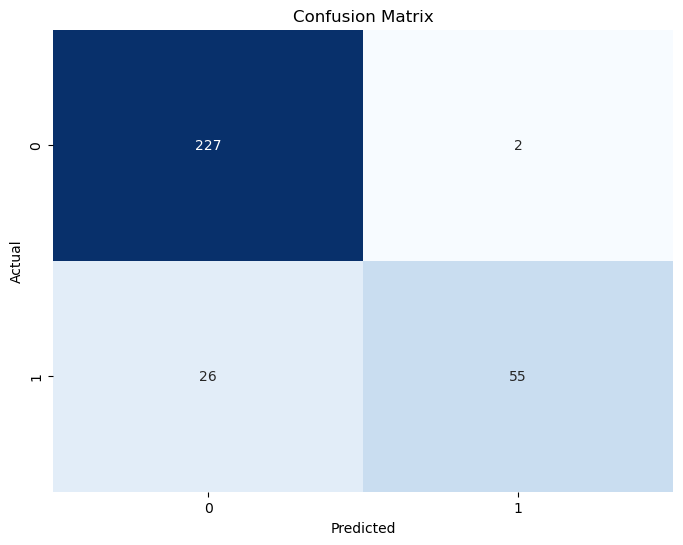

In [234]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [207]:
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

0.9657663485902204

In [208]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
pr_auc

0.9479302206003987

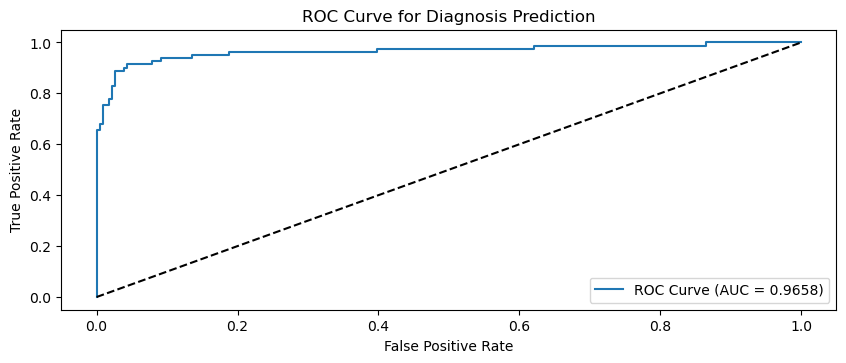

In [209]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diagnosis Prediction')
plt.legend(loc='lower right')

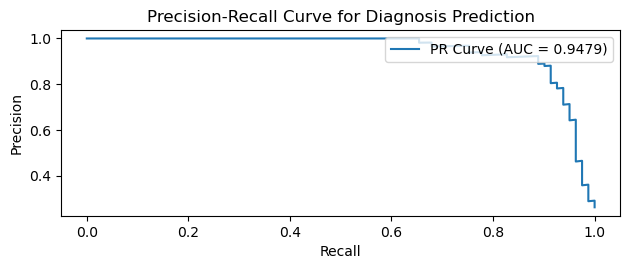

In [210]:
plt.subplot(2, 1, 2)
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Diagnosis Prediction')
plt.legend(loc='upper right')
plt.tight_layout()

In [217]:
def evaluate_model( msg, X_test, y_test, y_pred, y_proba ):
    w=18
    print(msg, '\n')
    cm = confusion_matrix(y_test, y_pred)
    print( cm ); print()
    print( f'%{w}s : %.4f' % ('Precision', precision_score(y_test, y_pred)))
    print( f'%{w}s : %.4f' % ('Recall', recall_score(y_test, y_pred)))
    print( f'%{w}s : %.4f' % ('F1 Score', f1_score(y_test, y_pred)))
    print( f'%{w}s : %.4f' % ('AUC-ROC', roc_auc_score(y_test, y_prob)))
    print( f'%{w}s : %.4f' % ('Average Precision', average_precision_score( y_test, y_prob)))
    print()
    
evaluate_model('Baseline Model Performance', X_test, y_test, y_pred, y_prob)

Baseline Model Performance 

[[227   2]
 [ 26  55]]

         Precision : 0.9649
            Recall : 0.6790
          F1 Score : 0.7971
           AUC-ROC : 0.9658
 Average Precision : 0.9482



In [219]:
# Now apply imbalanced-learn techniques

# 1. SMOTE (Oversampling)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
print(f"\nBefore SMOTE - Training examples: {len(X_train)}")
print(f"Class distribution: {np.bincount(y_train)}")

# Check new class distribution
print(f"\nAfter SMOTE - Training examples: {len(X_train_smote)}")
print(f"Class distribution: {np.bincount(y_train_smote)}")


Before SMOTE - Training examples: 1239
Class distribution: [917 322]

After SMOTE - Training examples: 1834
Class distribution: [917 917]


In [221]:
clf_smote = RandomForestClassifier(random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = clf_smote.predict(X_test)
y_proba_smote = clf_smote.predict_proba(X_test)

In [224]:
def evaluate_model( msg, X_test, y_test, y_pred, y_proba ):
    w=18
    print(msg, '\n')
    cm = confusion_matrix(y_test, y_pred)
    print( cm ); print()
    print( f'%{w}s : %.4f' % ('Precision', precision_score(y_test, y_pred)))
    print( f'%{w}s : %.4f' % ('Recall', recall_score(y_test, y_pred)))
    print( f'%{w}s : %.4f' % ('F1 Score', f1_score(y_test, y_pred)))
    print( f'%{w}s : %.4f' % ('AUC-ROC', roc_auc_score(y_test, y_proba[:,1])))
    print( f'%{w}s : %.4f' % ('Average Precision', average_precision_score( y_test, y_proba[:,1] )))
    print()
    
evaluate_model('SMOTE Model Performance', X_test, y_test, y_pred_smote, y_proba_smote)


SMOTE Model Performance 

[[217  12]
 [ 10  71]]

         Precision : 0.8554
            Recall : 0.8765
          F1 Score : 0.8659
           AUC-ROC : 0.9654
 Average Precision : 0.9358



In [226]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Check new class distribution
print(f"\nAfter Undersampling - Training examples: {len(X_train_rus)}")
print(f"Class distribution: {np.bincount(y_train_rus)}")


After Undersampling - Training examples: 644
Class distribution: [322 322]


In [228]:
clf_rus = RandomForestClassifier(random_state=42)
clf_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = clf_rus.predict(X_test)
y_proba_rus = clf_rus.predict_proba(X_test)

In [230]:
evaluate_model('Undersample Model Performance', X_test, y_test, y_pred_rus, y_proba_rus )

Undersample Model Performance 

[[198  31]
 [  6  75]]

         Precision : 0.7075
            Recall : 0.9259
          F1 Score : 0.8021
           AUC-ROC : 0.9525
 Average Precision : 0.9129



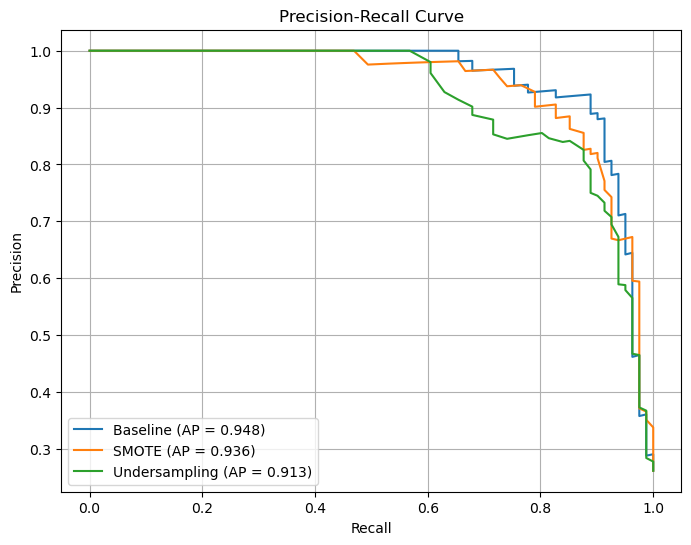

In [232]:
plt.figure(figsize=(8, 6))

# Baseline model PR curve
precision_base, recall_base, _ = precision_recall_curve(y_test, y_prob)
ap_base = average_precision_score(y_test, y_prob)
plt.plot(recall_base, precision_base, label=f'Baseline (AP = {ap_base:.3f})')

# SMOTE model PR curve
precision_smote, recall_smote, _ = precision_recall_curve(y_test, y_proba_smote[:, 1])
ap_smote = average_precision_score(y_test, y_proba_smote[:, 1])
plt.plot(recall_smote, precision_smote, label=f'SMOTE (AP = {ap_smote:.3f})')

# Undersampling model PR curve
precision_rus, recall_rus, _ = precision_recall_curve(y_test, y_proba_rus[:, 1])
ap_rus = average_precision_score(y_test, y_proba_rus[:, 1])
plt.plot(recall_rus, precision_rus, label=f'Undersampling (AP = {ap_rus:.3f})')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()